In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import sqlite3

sns.set(color_codes=True)
%matplotlib inline

database = "database.sqlite"
conn = sqlite3.connect(database)

In [2]:
conn = sqlite3.connect(database)
tables = pd.read_sql("""SELECT name as Name, type as Type
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,Name,Type
0,sqlite_sequence,table
1,Player_Attributes,table
2,Player,table
3,Match,table
4,League,table
5,Country,table
6,Team,table
7,Team_Attributes,table
8,test,table


In [7]:
players = pd.read_sql("""select 
player_api_id, overall_rating
from Player_Attributes""", conn)
match = pd.read_sql("""select home_team_api_id, away_team_api_id, home_team_goal, away_team_goal, 
                        home_player_1, home_player_2, home_player_3, home_player_4, home_player_5, home_player_6, home_player_7,home_player_8,home_player_9, home_player_10, home_player_11,
                        away_player_1, away_player_2, away_player_3, away_player_4, away_player_5, away_player_6, away_player_7, away_player_8, away_player_9, away_player_10, away_player_11
                        from Match""", conn)
ResultCol = match['home_team_goal'] - match['away_team_goal'] 
match['MatchResult'] = ResultCol
resultCategory = pd.cut(match.MatchResult, bins=[-100, -0.5, 0.5, 100], labels=['HTLost', 'HTDraw', 'HTWin'])
match.insert(4, 'Game Result', resultCategory)
match


,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Game Result,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,...,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,MatchResult
0,9987,9993,1,1,HTDraw,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,10000,9994,0,0,HTDraw,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,9984,8635,0,3,HTLost,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3
3,9991,9998,5,0,HTWin,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,7947,9985,1,3,HTLost,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,10190,10191,1,0,HTWin,42231.0,678384.0,95220.0,638592.0,413155.0,...,8800.0,67304.0,158253.0,133126.0,186524.0,93223.0,121115.0,232110.0,289732.0,1
25975,9824,10199,1,2,HTLost,33272.0,41621.0,25813.0,257845.0,114735.0,...,150007.0,178119.0,27232.0,570830.0,260708.0,201704.0,36382.0,34082.0,95257.0,-1
25976,9956,10179,2,0,HTWin,157856.0,274779.0,177689.0,294256.0,42258.0,...,202663.0,32597.0,114794.0,188114.0,25840.0,482200.0,95230.0,451335.0,275122.0,2
25977,7896,10243,0,0,HTDraw,NaN,8881.0,173534.0,39646.0,282287.0,...,197757.0,260964.0,231614.0,113235.0,41116.0,462608.0,42262.0,92252.0,194532.0,0


([<matplotlib.patches.Wedge at 0x1f021cbb3c8>,
 [Text(0.6813127610877548, 0.8636046095169827, 'HDefeat'),
  Text(-0.9444671178323757, 0.5638988059336582, 'HDraw'),
  Text(0.14226535609230934, -1.090761462674552, 'HWin')],
 [Text(0.3716251424115026, 0.47105705973653594, '28.7%'),
  Text(-0.5151638824540231, 0.3075811668729044, '25.4%'),
  Text(0.07759928514125962, -0.5949607978224829, '45.9%')])

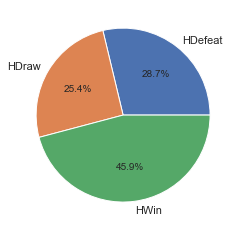

In [8]:
results = match.groupby('Game Result').size()
plt.pie(results, labels=['HDefeat', 'HDraw','HWin'], autopct='%.1f%%')

C:\Users\raulm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([1.26948689, 0.        , 0.        , 0.        , 0.        ,
        1.43692983, 0.        , 0.        , 0.        , 2.29358328]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

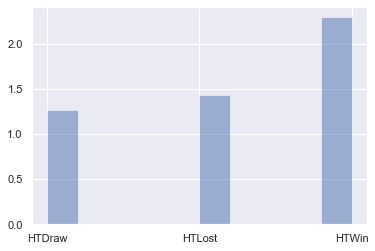

In [4]:
plt.hist(match['Game Result'], normed=True, alpha=0.5)
